# Supplementary material – "Trends in Industry Support for Pricing-Driven DevOps in SaaS"
**Submitted to:** IEEE Transactions on Services Computing

### General variables, parameters and module imports

> **DISCLAIMER:** This notebook is a part of the supplementary material for the paper "Trends in Industry Support for Pricing-Driven DevOps in SaaS" submitted to IEEE Transactions on Services Computing. The notebook is used to analyze the pricing models specified using Yaml4SaaS. The notebook is written in Python and uses multiple libraries for data analysis and visualization. You must install the requirements specified in the `requirements.txt` file to run this notebook.

In [3]:

from matplotlib import pyplot as plt
from IPython.display import display, Markdown
from adjustText import adjust_text
import seaborn as sns
import numpy as np
import pandas as pd
import os
import subprocess
import json


BASE_PATH = os.path.abspath('')
FIGURES_PATH = os.path.join(BASE_PATH, 'figures')
DATA_PATH = os.path.join(BASE_PATH, 'data')

STUDIED_YEARS = ["2019", "2020", "2021", "2022", "2023", "2024", "2025"]

In [4]:
analytics_path = os.path.join(DATA_PATH, 'pricings', 'json')

if not os.path.exists(analytics_path):
    os.makedirs(analytics_path)

# Check if data/json is empty
if not os.listdir(analytics_path):
    subprocess.run(["npm", "install"], check=True)
    subprocess.run(["npx", "ts-node", "src/scripts/analytics/extract-analytics.ts", "-d", "data/pricings/yaml/ICSOC'24"], check=True)
    subprocess.run(["npm", "run", "experiment"], check=True)
    print(f"Experiment completed successfully. You can find the logs in the {os.path.join(BASE_PATH, 'logs')} directory.")
else:
    print(f"The directory {analytics_path} is not empty. Please remove all previously extracted analytics from this directory if you wish to run the experiment and extract the analytics again.")



up to date, audited 345 packages in 582ms

54 packages are looking for funding
  run `npm fund` for details

1 moderate severity vulnerability

To address all issues, run:
  npm audit fix

Run `npm audit` for details.

> caise25-saas-analysis@1.0.0 experiment
> npm run add-versions-to-pricings && npm run generate-dzn-files && npm run analytics


> caise25-saas-analysis@1.0.0 add-versions-to-pricings
> ts-node src/scripts/utils/add-version-fields-to-pricings.ts


                EXPERIMENT INITIALIZATION: Pricings Validation
    Article: "Automated Analysis of iPricing"
    Authors: A. García-Fernández, J.A. Parejo, P. Trinidad, and A. Ruiz-Cortés
    LabPack: 1.0
    Date: 2025-03-29
    
Adding version field (if missing) to pricings in dataset...
Done!


> caise25-saas-analysis@1.0.0 generate-dzn-files
> ts-node src/scripts/utils/pricings2dzn.ts

Reading YAML files and parsing to MiniZinc datafiles...
	 DZN File Saved in ./data/pricings/dzn/ICSOC'24/box/2019.dzn
	 DZN File Saved in .

### Generation of Data Frames and Exploratory Analysis

In this section, we focus on the generation of data frames and the initial exploratory analysis of the SaaS pricing data. The data is extracted from the JSON files generated before, and transformed into structured data frames for further analysis. Key metrics such as the number of plans, features, add-ons, and configuration space size will be analyzed across different years. This step is crucial for understanding trends and patterns in the data, which will inform subsequent statistical and comparative analyses.


In [5]:
def build_dataframe(path):
    
    with open(path, 'r') as file:
        data = json.load(file)
        
    records = []
    
    for saas, years_data in data.items():
        for year_data in years_data:
            record = {
                'SaaS': saas,
                'Year': int(year_data['date'].split('-')[0]),
                'Plans': year_data['analytics']['numberOfPlans'],
                'Features': year_data['analytics']['numberOfFeatures'],
                'Addons': year_data['analytics']['numberOfAddOns'],
                'Configuration_space_size': year_data['analytics']['configurationSpaceSize'],
            }
            
            records.append(record)
            
    df = pd.DataFrame(records, columns=['SaaS', 'Year', 'Plans', 'Features', 'Addons', 'Configuration_space_size'])
    
    return df

# Building the DataFrame
analytics_file = os.path.join(analytics_path, [file for file in os.listdir(analytics_path) if file.endswith("TSC'25.json")][0])
df = build_dataframe(analytics_file)

# Displaying the DataFrame
df

,SaaS,Year,Plans,Features,Addons,Configuration_space_size
0,Box,2025,5,64,5,33
1,Box,2024,5,50,0,5
2,Box,2023,5,50,0,5
3,Box,2022,5,50,0,5
4,Box,2021,4,46,0,4
...,...,...,...,...,...,...
232,Zoom,2023,5,134,14,23296
233,Zoom,2022,5,108,10,1600
234,Zoom,2021,4,55,8,264
235,Zoom,2020,4,45,3,22


In [6]:
if not os.path.exists(os.path.join(DATA_PATH, 'CSVs')):
  os.mkdir(os.path.join(DATA_PATH, 'CSVs'))
# Save the dataframes as CSV
df.to_csv(os.path.join(DATA_PATH, 'CSVs', 'saas_pricingplans.csv'), index=False)

After transforming the JSON file containing all the data into a structured dataframe, its information has been exported as a CSV file, available at the path `data/CSVs/saas_pricingplans.csv` for further use or consultation. 

## Trends in SaaS Pricings

Aiming to answer the first research question (RQ) of the paper: **How are pricings' configuration and evaluation spaces evolving in modern SaaS?**, we now proceed to generate boxplots to analyze the evolution of key pricing metrics that impact the variability dimensions of these structures—namely, the configuration space and the evaluation space. Specifically, we create boxplots for the most relevant variables: features, plans, add-ons, and configuration space size. In each plot, the median is highlighted with a green line, while the mean is shown with a blue dashed line. For the configuration space size, however, due to the presence of extreme outliers that distort the visual scale, we omit both the outliers and the mean line to enhance interpretability.

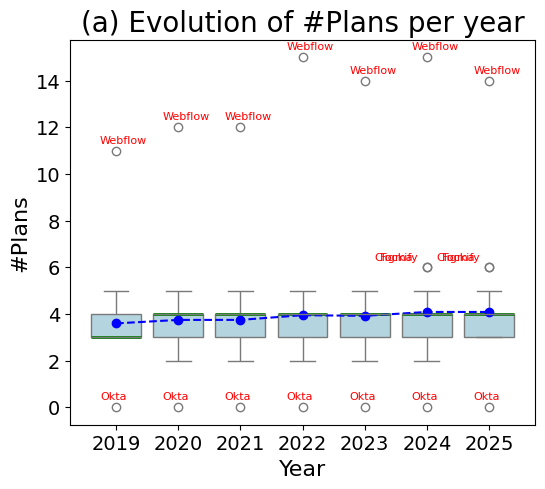

## Mean Plans:

|   Year |   Plans |
|-------:|--------:|
|   2019 | 3.59259 |
|   2020 | 3.74194 |
|   2021 | 3.74286 |
|   2022 | 3.94444 |
|   2023 | 3.91667 |
|   2024 | 4.08333 |
|   2025 | 4.08333 |

### Plans Increase:

13.659793814432986%

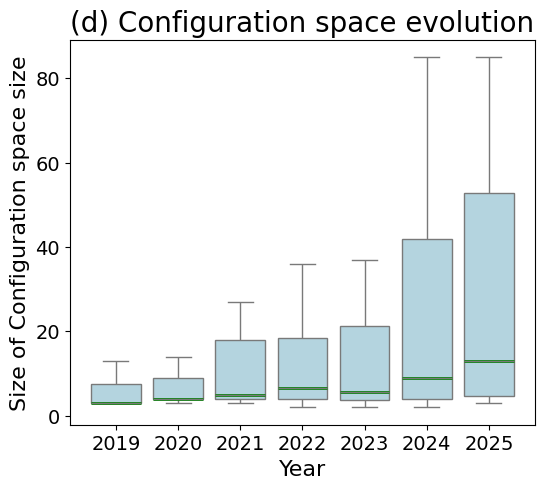

## Mean Configuration_space_size:

|   Year |   Configuration_space_size |
|-------:|---------------------------:|
|   2019 |                    30.7407 |
|   2020 |                    28.0968 |
|   2021 |                    86.5429 |
|   2022 |                   144.556  |
|   2023 |                   838.167  |
|   2024 |                  2962.86   |
|   2025 |                  1425.31   |

### Configuration_space_size Increase:

4536.536144578314%

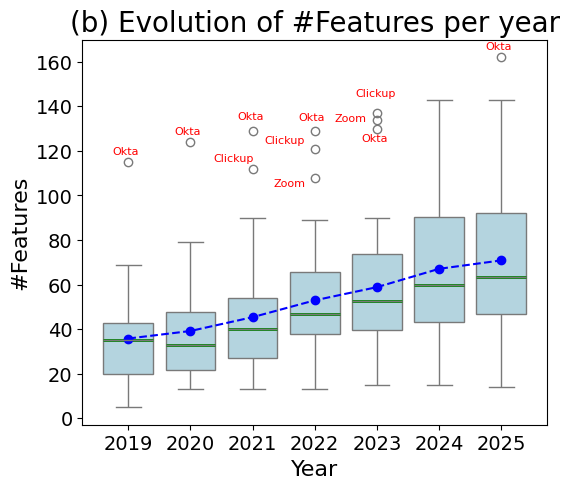

## Mean Features:

|   Year |   Features |
|-------:|-----------:|
|   2019 |    35.8148 |
|   2020 |    39.1935 |
|   2021 |    45.4    |
|   2022 |    52.9444 |
|   2023 |    58.8611 |
|   2024 |    67.0833 |
|   2025 |    70.8611 |

### Features Increase:

97.85418821096175%

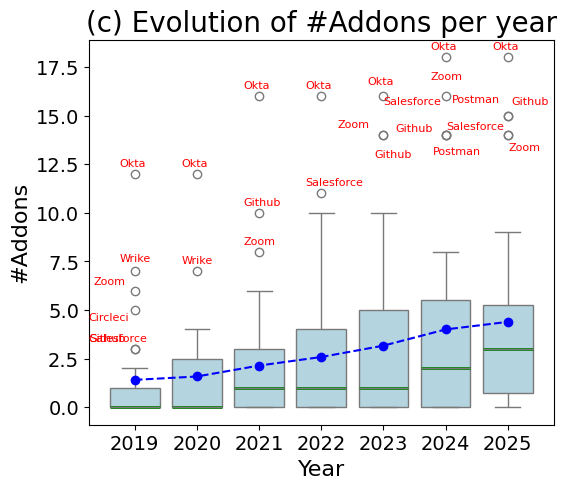

## Mean Addons:

|   Year |   Addons |
|-------:|---------:|
|   2019 |  1.40741 |
|   2020 |  1.58065 |
|   2021 |  2.14286 |
|   2022 |  2.58333 |
|   2023 |  3.16667 |
|   2024 |  4       |
|   2025 |  4.38889 |

### Addons Increase:

211.84210526315792%

In [7]:
titleSize=20
axisSize=16
fontSize=14
outliersSize=10
plt.rcParams.update({'font.size': fontSize})

def draw_boxplot(field, print_outliers=True, print_mean=True, title=None, y_label=None, tag="a"):
    plt.figure(figsize=(6, 5))
    sns.boxplot(x='Year', y=field, data=df, showfliers=print_outliers, color="lightblue")
    # Add green lines to show the median of each box
    medians = df.groupby('Year')[field].median()
    for i, (year, median) in enumerate(medians.items()):
        plt.hlines(y=median, xmin=i - 0.4, xmax=i + 0.4, color='green', linewidth=2)
    texts = []
    # Adding SaaS to outliers
    for year in df['Year'].unique():
        year_data = df[df['Year'] == year]
        q1 = year_data[field].quantile(0.25)
        q3 = year_data[field].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        if (print_outliers):
            outliers = year_data[(year_data[field] < lower_bound) | (year_data[field] > upper_bound)]
        else:
            outliers = pd.DataFrame()
        
        for idx, row in outliers.iterrows():
            texts.append(plt.gca().text(row['Year']-2019.1, row[field], row['SaaS'], horizontalalignment='right', fontsize=8, color='red'))
    adjust_text(texts, expand=(1.2, 2)) 

    # Calculate means and add line showing its evolution
    means = df.groupby('Year')[field].mean()
    if print_mean:
        plt.plot(means.index-2019, means.values, color='blue', marker='o', linestyle='--', label='Mean')


    if title is None:
        plt.title(f'({tag}) Evolution of #{field} per year', fontsize=titleSize)
    else:
        plt.title(title, fontsize=titleSize)
    plt.suptitle('')
    plt.xlabel('Year', fontsize=axisSize)
    if y_label is None:
        plt.ylabel(f'#{field}',fontsize=axisSize)
    else:
        plt.ylabel(y_label,fontsize=axisSize)
    plt.savefig(os.path.join(FIGURES_PATH,f"SaaS_{field}_Distribution_Evolution.png"), format='png', dpi=300)
    plt.show()
    display(Markdown(f"## Mean {field}:"))
    display(Markdown(means.to_markdown()))
    display(Markdown(f"### {field} Increase:"))
    display(Markdown(str((means[int(STUDIED_YEARS[-1])]/means[int(STUDIED_YEARS[0])] -1)*100)+"%"))

draw_boxplot('Plans')
draw_boxplot('Configuration_space_size', print_outliers=False, print_mean=False, title="(d) Configuration space evolution", y_label="Size of Configuration space size")
draw_boxplot('Features', tag="b")
draw_boxplot('Addons', tag="c")

The following conclusions can be drawn from the boxplots:

- **Features growing rate**. The results show a linear increase in the number of features over the years. From 2019 to 2025, the average number of features of the SaaS under study has increased by 98\% (from 35.81 to 70.86).

- **Evolution of the numbers of plans**. The number of plans has shown a relatively stable trend from 2019 to 2025, with the number of plans hovering around three to four (the mean increase between 2019 and 2025 is 14\%). While there are occasional outliers, such as *Webflow*, the overall distribution does not show significant increases or decreases in the number of plans offered. This suggests that while some SaaS providers may experiment with the number of plans, the general approach across the industry has remained consistent in terms of the number of plans available to customers. The reason for this tendency might be the Paradox of Choice, as keeping a reduced number of plans facilitates the decision of the customer. 

- **Evolution of the number of add-ons**. SaaS pricings show a clear trend toward incorporating more add-ons, with projections suggesting a continued linear increase. Between 2019 and 2025, the average number of add-ons grew by 211.84\% (from 1.41 to 4.39), reflecting a shift in pricing strategies. This rise can be explained by the fact that add-ons allow for greater configurability without inducing the Paradox of Choice. Consequently, as depicted in the boxplot that illustrates the evolution of the configuration space size, this expansion has led to an exponential growth in the configuration space, empirically validating our formulation of its size (in the paper). Furthermore, the 2025 median configuration space size surpasses the third quartile threshold of 2019, reinforcing the idea of a market-wide transformation in SaaS pricing design.

## Comparison with first stage of the study analysis

As discussed in the article, the study has been conducted in two distinct stages. This two-phase structure motivates our second research question:

**RQ2: Do the trends identified in the first stage of the study persist when analyzing a larger and temporally extended dataset?**

The goal of this section is to assess whether the trends discovered during the initial stage (which analyzed 162 pricings from 30 SaaS providers between 2019 and 2024) remain consistent in the extended stage presented in this study (which covers 240 pricings from 37 SaaS providers, spanning 2019 to 2025).

To address this question, we will compare the results of both stages using unified boxplot visualizations for each key variable involved in the configuration and evaluation spaces: features, plans, add-ons, and configuration space size. Since the original study also used boxplots with the same structure, this visual comparison provides a consistent and reliable basis for evaluating the evolution of each dimension.

Importantly, because our primary interest lies in comparing the trends —rather than analyzing individual anomalies— we have chosen to exclude outliers from these visualizations, thereby reducing noise and allowing for clearer interpretation of the underlying patterns.

Let's start by filtering the pricings from the original study and saving this dataset also as a CSV.

In [8]:
# Building the DataFrame
analytics_file = os.path.join(analytics_path, [file for file in os.listdir(analytics_path) if file.endswith("ICSOC'24.json")][0])
df_2024 = build_dataframe(analytics_file)

df_2024 = df_2024[~df_2024['SaaS'].isin(['Circleci', 'Okta', 'Shopify', 'Trello', 'Webflow', 'Zenhub', 'Zoom'])] # These are the SaaS included in the second stage of the analysis

# Displaying the DataFrame
df_2024

,SaaS,Year,Plans,Features,Addons,Configuration_space_size
0,Box,2024,5,50,0,5
1,Box,2023,5,50,0,5
2,Box,2022,5,50,0,5
3,Box,2021,4,46,0,4
4,Box,2020,4,41,0,4
...,...,...,...,...,...,...
156,Zapier,2024,4,51,4,40
157,Zapier,2023,5,51,0,5
158,Zapier,2022,5,31,0,5
159,Zapier,2020,5,21,0,5


In [9]:
if not os.path.exists(os.path.join(DATA_PATH, 'CSVs')):
  os.mkdir(os.path.join(DATA_PATH, 'CSVs'))
# Save the dataframes as CSV
df_2024.to_csv(os.path.join(DATA_PATH, 'CSVs', 'saas_pricingplans_2024.csv'), index=False)

The generated CSV can be found in `data/CSVs/saas_pricingplans_2024.csv`.

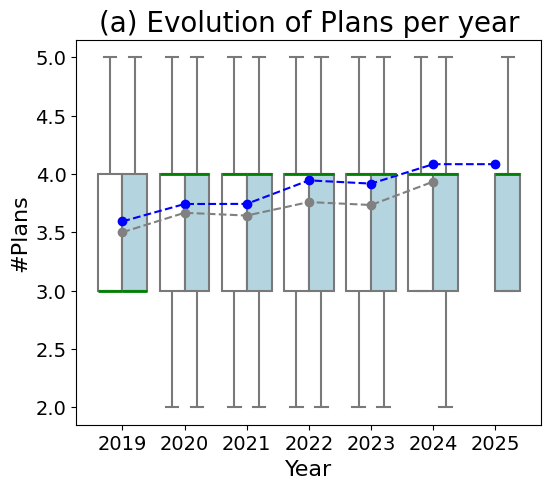

## Mean Plans (2019-2025 vs 2019-2024):

|   Year |   Plans |
|-------:|--------:|
|   2019 | 3.59259 |
|   2020 | 3.74194 |
|   2021 | 3.74286 |
|   2022 | 3.94444 |
|   2023 | 3.91667 |
|   2024 | 4.08333 |
|   2025 | 4.08333 |

|   Year |   Plans |
|-------:|--------:|
|   2019 | 3.5     |
|   2020 | 3.66667 |
|   2021 | 3.64286 |
|   2022 | 3.75862 |
|   2023 | 3.73333 |
|   2024 | 3.93333 |

### Plans Increase:

- **2019-2025:** 13.66%

- **2019-2024:** 12.38%

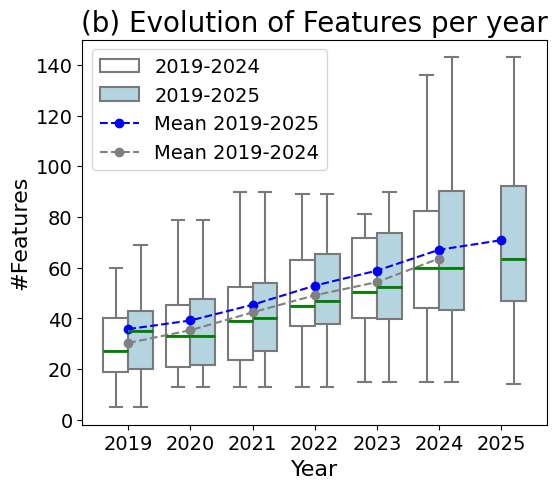

## Mean Features (2019-2025 vs 2019-2024):

|   Year |   Features |
|-------:|-----------:|
|   2019 |    35.8148 |
|   2020 |    39.1935 |
|   2021 |    45.4    |
|   2022 |    52.9444 |
|   2023 |    58.8611 |
|   2024 |    67.0833 |
|   2025 |    70.8611 |

|   Year |   Features |
|-------:|-----------:|
|   2019 |    30.35   |
|   2020 |    35.375  |
|   2021 |    42.3929 |
|   2022 |    49.1379 |
|   2023 |    54.3333 |
|   2024 |    63.6333 |

### Features Increase:

- **2019-2025:** 97.85%

- **2019-2024:** 109.67%

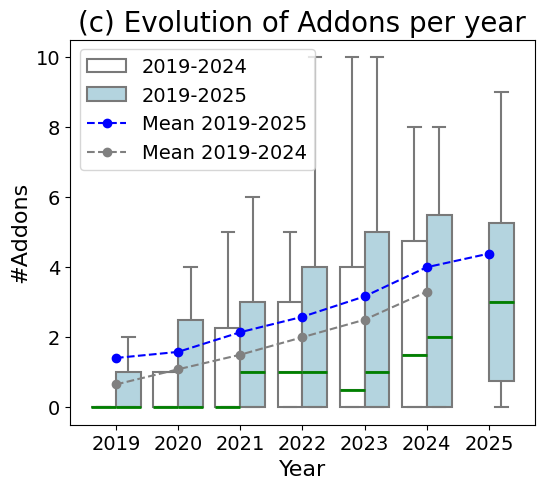

## Mean Addons (2019-2025 vs 2019-2024):

|   Year |   Addons |
|-------:|---------:|
|   2019 |  1.40741 |
|   2020 |  1.58065 |
|   2021 |  2.14286 |
|   2022 |  2.58333 |
|   2023 |  3.16667 |
|   2024 |  4       |
|   2025 |  4.38889 |

|   Year |   Addons |
|-------:|---------:|
|   2019 |  0.65    |
|   2020 |  1.08333 |
|   2021 |  1.5     |
|   2022 |  2       |
|   2023 |  2.5     |
|   2024 |  3.3     |

### Addons Increase:

- **2019-2025:** 211.84%

- **2019-2024:** 407.69%

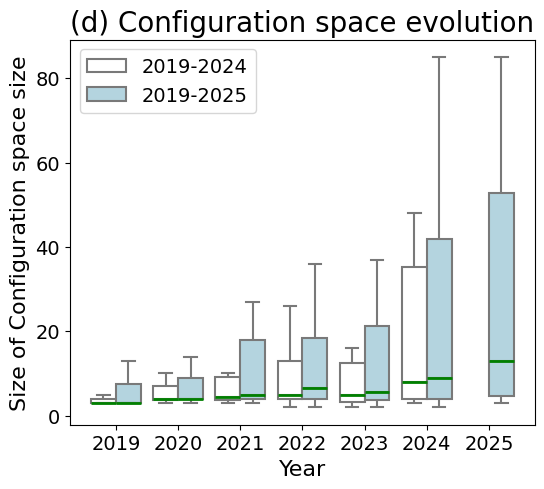

## Mean Configuration_space_size (2019-2025 vs 2019-2024):

|   Year |   Configuration_space_size |
|-------:|---------------------------:|
|   2019 |                    30.7407 |
|   2020 |                    28.0968 |
|   2021 |                    86.5429 |
|   2022 |                   144.556  |
|   2023 |                   838.167  |
|   2024 |                  2962.86   |
|   2025 |                  1425.31   |

|   Year |   Configuration_space_size |
|-------:|---------------------------:|
|   2019 |                    13.65   |
|   2020 |                    15.3333 |
|   2021 |                    19.6429 |
|   2022 |                    55.3793 |
|   2023 |                   162.533  |
|   2024 |                   597.133  |

### Configuration_space_size Increase:

- **2019-2025:** 4536.54%

- **2019-2024:** 4274.60%

In [10]:
titleSize=20
axisSize=16
fontSize=14
outliersSize=10
plt.rcParams.update({'font.size': fontSize})

def draw_comparative_boxplot(df1, df2, field, label1="Dataset 1", label2="Dataset 2",
                             print_mean=True, title=None, y_label=None, legend=True, tag="a"):
    """Draw a comparative boxplot between two datasets."""
    
    # Convert 'Year' to string to avoid alignment issues in Seaborn
    df1["Dataset"] = label1
    df2["Dataset"] = label2
    df1["Year"] = df1["Year"].astype(str)
    df2["Year"] = df2["Year"].astype(str)

    # Combine both datasets
    df_combined = pd.concat([df1, df2])
    df_combined = df_combined.sort_values(by="Year")

    # Create figure
    plt.figure(figsize=(6, 5))
    ax = sns.boxplot(x="Year", y=field, hue="Dataset", data=df_combined, 
                     showfliers=False, linewidth=1.5, palette=["white", "lightblue"], legend=legend)
    
    # Add green lines to show the median of each box
    medians_df1 = df1.groupby("Year")[field].median()
    medians_df2 = df2.groupby("Year")[field].median()
    for i, (year, median) in enumerate(medians_df1.items()):
        plt.hlines(y=median, xmin=i, xmax=i + 0.4, color='green', linewidth=2, zorder=3)
    for i, (year, median) in enumerate(medians_df2.items()):
        plt.hlines(y=median, xmin=i - 0.4, xmax=i, color='green', linewidth=2, zorder=3)

    # Calculate means for each dataset
    means_df1 = df1.groupby("Year")[field].mean()
    means_df2 = df2.groupby("Year")[field].mean()

    # Add lines showing the evolution of the mean
    if print_mean:
        plt.plot(means_df1.index, means_df1.values, color='blue', marker='o', linestyle='--', label=f'Mean {label1}')
        plt.plot(means_df2.index, means_df2.values, color='grey', marker='o', linestyle='--', label=f'Mean {label2}')

    # Set title and labels
    if title is None:
        plt.title(f'({tag}) Evolution of {field} per year', fontsize=titleSize)
    else:
        plt.title(title, fontsize=titleSize)
    
    plt.xlabel("Year", fontsize=axisSize)
    plt.ylabel(y_label if y_label else f"#{field}", fontsize=axisSize)
    plt.xticks(fontsize=fontSize)  # Rotate the years to avoid overlap
    plt.yticks(fontsize=fontSize)
    if legend:
        plt.legend(fontsize=fontSize)
    # Save image
    plt.savefig(os.path.join(FIGURES_PATH, f"SaaS_{field}_Comparison_Boxplot.png"), format='png', dpi=300)
    
    # Show plot
    plt.show()

    # Display statistics in Markdown
    display(Markdown(f"## Mean {field} ({label1} vs {label2}):"))
    display(Markdown(means_df1.to_markdown()))
    display(Markdown(means_df2.to_markdown()))

    display(Markdown(f"### {field} Increase:"))
    increase1 = (means_df1.iloc[-1] / means_df1.iloc[0] - 1) * 100
    increase2 = (means_df2.iloc[-1] / means_df2.iloc[0] - 1) * 100
    display(Markdown(f"- **{label1}:** {increase1:.2f}%"))
    display(Markdown(f"- **{label2}:** {increase2:.2f}%"))

draw_comparative_boxplot(df, df_2024, "Plans", "2019-2025", "2019-2024", legend=False, tag="a")
draw_comparative_boxplot(df, df_2024, "Features", "2019-2025", "2019-2024", tag="b")
draw_comparative_boxplot(df, df_2024, "Addons", "2019-2025", "2019-2024", tag="c")
draw_comparative_boxplot(df, df_2024, "Configuration_space_size", "2019-2025", "2019-2024", print_mean=False, tag="d", title="(d) Configuration space evolution", y_label="Size of Configuration space size")

As can be seen, although the expanded dataset shows a slight increase across all metrics (features, plans, and add-ons), the overall evolution trends remain consistent—both throughout the years analyzed in the first stage and in the newly incorporated 2025 snapshots.

# Statistical tests

We compare if there are significant differences in the numer of features, plans and addons in the whole set of SaaS among the extreme years of the study (2019 and 2024).

In [11]:
from scipy.stats import ttest_ind, mannwhitneyu, shapiro, levene

# Filter data for 2019 and 2024
df_2019 = df[df['Year'] == STUDIED_YEARS[0]]
df_2025 = df[df['Year'] == STUDIED_YEARS[-1]]

# Compare Features
features_2019 = df_2019['Features'].dropna()
features_2025 = df_2025['Features'].dropna()

# Normality Test:
normal_features_2019 = shapiro(features_2019).pvalue > 0.05
normal_features_2025 = shapiro(features_2025).pvalue > 0.05

# Homoscedasticity (Variance homogeneity) test:
equal_var_features = levene(features_2019, features_2025).pvalue > 0.05

# T Student or Mann-Withney U tests:
if normal_features_2019 and normal_features_2025 and equal_var_features:
    features_stat, features_pvalue = ttest_ind(features_2019, features_2025)
else:
    features_stat, features_pvalue = mannwhitneyu(features_2019, features_2025)

# Compare Plans
plans_2019 = df_2019['Plans'].dropna()
plans_2025 = df_2025['Plans'].dropna()

# Normality Test:
normal_plans_2019 = shapiro(plans_2019).pvalue > 0.05
normal_plans_2025 = shapiro(plans_2025).pvalue > 0.05

# Homoscedasticity (Variance homogeneity) test:
equal_var_plans = levene(plans_2019, plans_2025).pvalue > 0.05

# T Student or Mann-Withney U tests:
if normal_plans_2019 and normal_plans_2025 and equal_var_plans:
    plans_stat, plans_pvalue = ttest_ind(plans_2019, plans_2025)
else:
    plans_stat, plans_pvalue = mannwhitneyu(plans_2019, plans_2025)

# Compare addons 
addons_2019 = df_2019['Addons'].dropna()
addons_2025 = df_2025['Addons'].dropna()

# Normality Test:
normal_addons_2019 = shapiro(addons_2019).pvalue > 0.05
normal_addons_2025 = shapiro(addons_2025).pvalue > 0.05

# Homoscedasticity (Variance homogeneity) test:
equal_var_addons = levene(addons_2019, addons_2025).pvalue > 0.05

# T Student or Mann-Withney U tests:
if normal_addons_2019 and normal_addons_2025 and equal_var_addons:
    addons_stat, addons_pvalue = ttest_ind(addons_2019, addons_2025)
else:
    addons_stat, addons_pvalue = mannwhitneyu(addons_2019, addons_2025)

print("            p-value")
print(f"Features:   {features_pvalue:.6f}")
print(f"Plans:      {plans_pvalue:.6f}")
print(f"Add-ons:    {addons_pvalue:.6f}")

            p-value
Features:   0.000016
Plans:      0.030021
Add-ons:    0.000703


This code compares the features, plans and add-ons between 2019 and 2025 to see if there are statistically significant differences using the appropriate test depending on normality and homogeneity of variances.

**All the tests has shown statistically significant differences** (all p-values are <0.05), and differences between years 2019 and 2025 in addons and features were very strongly significant.

Next we compute effect size estimators. To calculate the effect size of the differences between 2019 and 2025, we can use Cohen's d for the Student's t-test (data following a normal distribution with homogeneous variance) and the r statistic for the Mann-Whitney U test (data that does not follow a normal distribution or with heterogeneous variance).

In [12]:
# Function for computing Cohen's d
def cohen_d(x, y):
    nx = len(x)
    ny = len(y)
    dof = nx + ny - 2
    return (np.mean(x) - np.mean(y)) / np.sqrt(((nx - 1) * np.var(x) + (ny - 1) * np.var(y)) / dof)

if normal_features_2019 and normal_features_2025 and equal_var_features: 
    features_effect_size = cohen_d(features_2019, features_2025)
    features_estimator = "Cohen' s d:"
else:    
    features_effect_size = features_stat / np.sqrt(len(features_2019) * len(features_2025))
    features_estimator = "r:"

if normal_plans_2019 and normal_plans_2025 and equal_var_plans:    
    plans_effect_size = cohen_d(plans_2019, plans_2025)
    plans_estimator = "Cohen' s d:"
else:    
    plans_effect_size = plans_stat / np.sqrt(len(plans_2019) * len(plans_2025))
    plans_estimator = "r:"

if normal_addons_2019 and normal_addons_2025 and equal_var_addons:
    addons_effect_size = cohen_d(addons_2019, addons_2025)
    addons_estimator = "Cohen' s d :"
else:    
    addons_effect_size = addons_stat / np.sqrt(len(addons_2019) * len(addons_2025))
    addons_estimator = "r:"

('Features',features_estimator,features_effect_size), ('Plans',plans_estimator, plans_effect_size), ('Addons',addons_estimator, addons_effect_size)

(('Features', 'r:', np.float64(5.6131276171213615)),
 ('Plans', 'r:', np.float64(10.9536176071254)),
 ('Addons', 'r:', np.float64(8.14705379856472)))

In [13]:
(equal_var_features,normal_features_2019,normal_features_2025),(equal_var_plans,normal_plans_2019,normal_plans_2025),(equal_var_addons,normal_addons_2019,normal_addons_2025)

((np.False_, np.False_, np.True_),
 (np.True_, np.False_, np.False_),
 (np.False_, np.False_, np.False_))


The effect size values computed in the analysis provide a measure of the magnitude of the differences between the two groups (2019 and 2025) for features, plans, and addons. Here is how to interpret these values:

#### Cohen's d (for t-tests)

Cohen's d is used to measure the effect size for t-tests. The interpretation of Cohen's d values is as follows:

* 0.2: Small effect size
* 0.5: Medium effect size
* 0.8: Large effect size
* A larger Cohen's d indicates a greater difference between the means of the two groups.

#### r (for Mann-Whitney U tests)
The effect size r for the Mann-Whitney U test is interpreted similarly to correlation coefficients:

* 0.1: Small effect size
* 0.3: Medium effect size
* 0.5: Large effect size
* A larger r indicates a greater difference between the distributions of the two groups.

> **WARNING:** In our results, the coefficient of the r estimator is multiplied by 10 to facilitate the interpretation of the results.

### Practical Interpretation
**Features Effect Size:**

Since the effect size is above 0.5 (r estimator is used), the difference is large.


**Plans Effect Size:**

Since the effect size is above 0.5 (r estimator is used), the difference is large.

**Addons Effect Size:**

Since the effect size is above 0.5 (r estimator is used), the difference is large.


These effect sizes help us understand not just whether there is a statistically significant difference, but also the practical significance of the difference. A statistically significant result with a small effect size may indicate that while the difference is real, it is not very impactful in practical terms. Conversely, a large effect size indicates a meaningful difference that could have strong practical implications.